# K-mean - Clusterization
Here I will use the K-means algorithm to classify the data

In [1]:
#Load Modules
from pandas import read_csv
import pandas as pd
from time import sleep
from numpy import ones, zeros, reshape, sum, array, dot,apply_along_axis, trace, bincount
from numpy.random import rand
from numpy.linalg import norm
from scipy.optimize import fmin as fmini
from pylab import plot, scatter, xlabel, ylabel, contour,figure, show, axes
from sklearn.svm import SVC
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Here we import the data from a .mat file
import scipy.io
dataA = scipy.io.loadmat('data/data6.mat')
x = dataA['X']
#We observe 5 examples
print '5 Examples of the data'
print x[:5]


#Plot Data in same color since they have no label
scatter(x[:,0],x[:,1], marker = 'o', c='c')

#Declaration of useful global variables
global K, m
m = x.shape[0]
K = 3 #This defines the number of centroids to be used, or the number of bins we want our data to be separated in

#Example of random initialization of centroids
ind = randint(x.shape[0],size = K)
inCentroids = x[ind]
scatter(inCentroids[:,0],inCentroids[:,1], marker = 'o', c='r', s=50)
title('Data and example of %d random centroids'%K)

5 Examples of the data
[[ 1.84207953  4.6075716 ]
 [ 5.65858312  4.79996405]
 [ 6.35257892  3.2908545 ]
 [ 2.90401653  4.61220411]
 [ 3.23197916  4.93989405]]


In [3]:
#This function calculates the sum the distances from the data to their respective centroid
#This is the function to minimize
#We could also use the recursive algorithm of moving the centroids to the mean position but
#if we have a this cost function it is much easier to minimize using a minimization algorithm
def Kmeans(centroids,x):
    centroids = reshape(centroids,(K,2))
    N = empty((m,K))
    for k in range(K):
        N[:,k] = norm(x-centroids[k],axis=1)
        d = amin(N,axis = 1)
        J = mean(d)
    return J

def clusterData(centroids,x):
    centroids = reshape(centroids,(K,2))
    N = empty((m,K))
    for k in range(K):
        N[:,k] = norm(x-centroids[k],axis=1)
        index = argmin(N,axis = 1)
    return index

The algorithm achieves a minimization function of J = 0.792363
Data should be clustered indicating each cluster with a different color


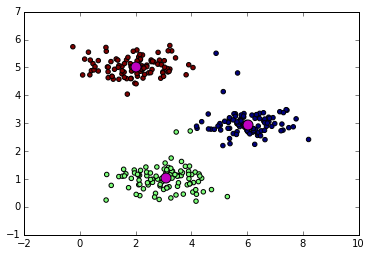

In [4]:
#Since the algorithm can achieve local minimum due to the random initialization of the centroids
#we execute the algorithm several times and keep the solution that gives the lowest cost function (Kmeans)

num = 5 #Number of times to run the algorithm

centroids = empty((num,2*K))
J = empty(num)

for i in range(num):
    ind = randint(x.shape[0],size = K) #Random initialization of centroids
    inCentroids = x[ind]  
    ans = fmini(Kmeans, inCentroids.flatten() ,args = (x,), disp=0, full_output = 1)
    centroids[i,:] = ans[0]
    J[i] = ans[1]

centroid = centroids[argmin(J),:]
index = clusterData(centroid,x)    
centroid = reshape(centroid,(K,2))
scatter(x[:,0],x[:,1], marker = 'o', c = index)
scatter(centroid[:,0],centroid[:,1], marker = 'o', c='m',s = 100)

print 'The algorithm achieves a minimization function of J = %f' %amin(J)
print 'Data should be clustered indicating each cluster with a different color'